<a href="https://colab.research.google.com/github/JustSerhii/gestures-lab3/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
################################################
### using filtered data

In [53]:
import pickle
with open('shaped.pickle', 'rb') as f:
    ab = pickle.load(f)

# Новий розділ

In [54]:
ab.shape

(297, 1200)

In [55]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import numpy #,  string #pandas, xgboost, textblob,
#from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers

In [56]:
import tensorflow as tf
tf. __version__

'2.18.0'

In [57]:
!nvidia-smi


Tue Apr 22 08:07:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P0             27W /   70W |     248MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [58]:
# Перевірка, які пристрої бачить TensorFlow:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("List of physical devices:", tf.config.list_physical_devices())

# Перевірка CPU (виведе модель процесора, кількість ядер тощо):
!cat /proc/cpuinfo | grep "model name" | uniq

TensorFlow version: 2.18.0
List of physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz


In [59]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [60]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [61]:
print("Physical devices:", tf.config.list_physical_devices())

# 2. Перевірка назви стандартного GPU-пристрою (якщо він є):
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print("Зараз активний CPU або інше, GPU не знайдено:", device_name)
else:
    print("Використовується GPU:", device_name)

Physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Використовується GPU: /device:GPU:0


In [62]:
# Define models:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_y)

def train_model2(classifier, feature_vector_train, label, feature_vector_valid, valid_Y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_Y)

In [63]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import numpy as np
from scipy.sparse import csr_matrix

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time
import warnings

import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import scipy

In [64]:
y_ = np.ones(len(ab))

In [65]:
start_time = time.time()
#a = np.reshape(np.array(tempvar),(297*20,60))

#base parameters
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10, #maybe more
                'n_clusters': 4, #3 is actual number
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

params = default_base.copy()

pca = TruncatedSVD(n_components=10)
pca.fit(ab)
#csr_matrix(
transformed_ = pca.transform(ab)
end_time = time.time()
end_time-start_time

0.1304330825805664

In [66]:
#X_embedded2 = X_embedded

In [67]:
#X_embedded = transformed_

In [68]:
start_time = time.time()
#X_embedded = TSNE(n_components=2).fit_transform(transformed_)
X_embedded = transformed_
end_time = time.time()
end_time-start_time

6.556510925292969e-05

In [69]:
# ============
# Create cluster objects
# ============



two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

clustering_algorithms = (
        ('MBatchKMeans', two_means),
)

plot_num = 1

0.02357649803161621

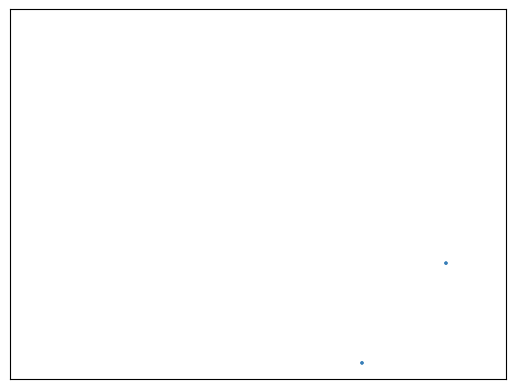

In [70]:
for name, algorithm in clustering_algorithms:

        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X_embedded)



        t1 = time.time()

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X_embedded)

        plt.subplot(1, len(clustering_algorithms), plot_num)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])


        plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

        plot_num += 1

        # stop, plot only one image
        break

#plt.show()
t1-t0

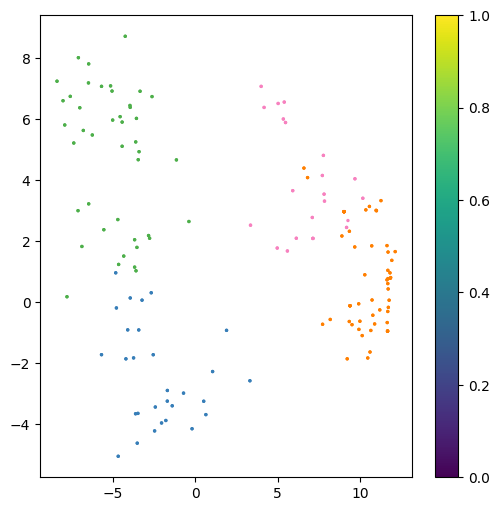

In [71]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

In [72]:
y_pred.shape

(297,)

In [73]:
#optional classifiers to choose
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#import seaborn as sns

In [74]:
# ab (297x1200)!

In [75]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

0.0008440017700195312

In [76]:
import numpy as np
#import pandas as pd
import os

import tensorflow as tf
#import tensorflow_addons as tfa #none
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

import glob
#import imageio
import time
import IPython.display as ipd

#AUTOTUNE = tf.data.experimental.AUTOTUNE

In [77]:
# Shallow Neural Networks
# model nx100xn

import numpy as np
import scipy.sparse
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [78]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K

In [79]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

In [80]:
def create_dense_ae():
    # Розмірність кодованого простору
    hidden_dim = 60
    encoding_dim = 2

    # Кодувальник
    input = Input(shape=(10*1, )) # 10*1,  - розмірність вхідного шару
    # Додатковий шар для кодування вхідного представлення
    flat = Flatten()(input)

    hidden = Dense(hidden_dim, activation='relu')(flat)
    hidden2 = Dense(hidden_dim, activation='relu')(hidden)
    # Приховане подання кодувальника
    encoded = Dense(encoding_dim, activation='relu')(hidden2)

    # Декодувальник
    # Аналогічним чином, але послідовність шарів протилежна кодувальнику
    input_encoded = Input(shape=(encoding_dim,))
    hidden_encoded = Dense(hidden_dim, activation='sigmoid')(input_encoded)
    hidden_encoded2 = Dense(hidden_dim, activation='sigmoid')(hidden_encoded)

    flat_decoded = Dense(10*1, activation='sigmoid')(hidden_encoded2)
    decoded = Reshape((10*1, ))(flat_decoded)

    # Таким чином можна подати окремо модель як для кодувальника так і декодувальника
    # Або подавати шари окермо
    encoder = Model(input, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input, decoder(encoder(input)), name="autoencoder")
    return encoder, decoder, autoencoder

In [81]:
# перелік наявних пристроїв (у випадку TF-DML)

In [82]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [83]:
with tf.device("/device:GPU:0"): # /device:DML:0 для версії 1.15
    encoder, decoder, autoencoder = create_dense_ae()
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [84]:
# якщо все гаразд, у консолі Conda має бути подібний текст:
# tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (___ім'я вашої відеокарти___)
# tensorflow/c/logging.cc:34] Successfully opened dynamic library Kernel32.dll
# tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272]
# Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with XXXX MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)

# зазвичай обсяг пам'яті може бути вищим через віртуальну пам'ять системи, наприклад 8192 замість 4096 МB, якщо відеокарта на 4096 MB

In [85]:
# якщо немає відеокарти як такої (наприклад, якщо є процесор з ARM архітектурою без виділеного відеоядра), можливо написати і так:

In [86]:
#with tf.device("/device:CPU:0"):
#    encoder, decoder, autoencoder = create_dense_ae()
#    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [87]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 2)              │         4,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 10)             │         4,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,892 (34.73 KB)

 Trainable params: 8,892 (34.73 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
import time
import tensorflow as tf

# Створимо клас Callback для замірів часу:
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_times = []
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed = time.time() - self.epoch_start_time
        self.epoch_times.append(elapsed)

# Тепер додаємо цей колбек до autoencoder.fit():
time_callback = TimeHistory()

with tf.device("/device:GPU:0"):
    start_time = time.time()
    autoencoder.fit(
        train_x, train_x,
        epochs=500,
        batch_size=50,
        shuffle=True,
        validation_data=(valid_x, valid_x),
        callbacks=[time_callback],   # <-- передаємо колбек
        verbose=1
    )
    end_time = time.time()

total_time = end_time - start_time

# Список тривалостей кожної епохи:
epoch_times = time_callback.epoch_times
first_epoch_time = epoch_times[0]
avg_time_2_onward = sum(epoch_times[1:]) / (len(epoch_times) - 1)

print("-------------------------------------------------")
print(f"Загальний час (1..500 епох): {total_time:.3f} с")
print(f"Час першої епохи:           {first_epoch_time:.3f} с")
print(f"Середній час з 2-ї епохи:   {avg_time_2_onward:.3f} с")
print("-------------------------------------------------")

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - accuracy: 0.2742 - loss: 0.3195 - val_accuracy: 0.2133 - val_loss: 0.0990
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2764 - loss: 0.1291 - val_accuracy: 0.2133 - val_loss: -0.0911
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2239 - loss: -0.0836 - val_accuracy: 0.2133 - val_loss: -0.2800
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2300 - loss: -0.2313 - val_accuracy: 0.2133 - val_loss: -0.4638
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2245 - loss: -0.4234 - val_accuracy: 0.2133 - val_loss: -0.6449
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3636 - loss: -0.6604 - val_accuracy: 0.6267 - val_loss: -0.8268
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6822 - loss: -0.8712 - val_accuracy: 0.6133 - val_loss: -1.0080
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6939 - loss: -1.0806 - val_accuracy: 0.613

In [89]:
# зауважте, що час виконання залежно від версії DirectML або типу обладнання може суттєво відрізнятися
# також час виконання на першій ітерації під відеокартою зазвичай вищий, ніж на наступних

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


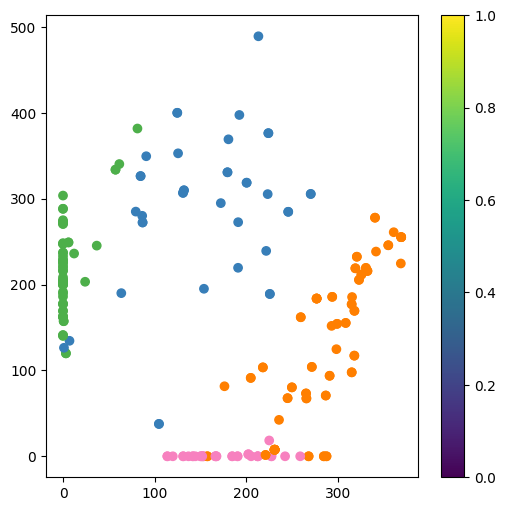

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


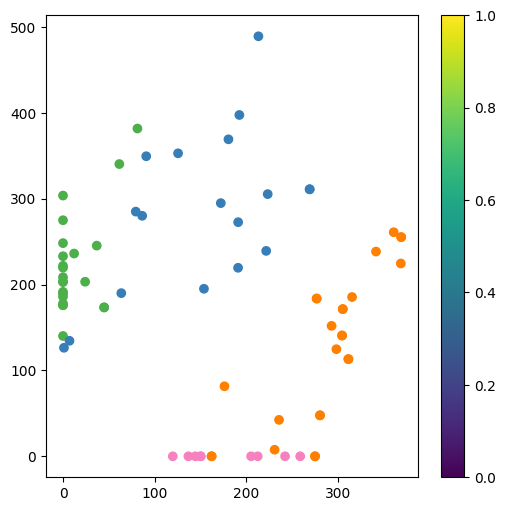

In [90]:
#Because latent space is two-dimensional, there are a few visualizations that can be done at this point.
#One is to look at the neighborhoods of different classes on the latent 2D plane:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(valid_y) + 1))))

start_time = time.time()
x_train_encoded = encoder.predict(train_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c = colors[train_y])
plt.colorbar()
plt.show()

x_test_encoded = encoder.predict(valid_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c = colors[valid_y])
plt.colorbar()
plt.show()
end_time = time.time()

In [91]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(ab, y_pred)
end_time = time.time()
end_time-start_time

0.0023505687713623047

In [92]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
start_time = time.time()
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

0.0026319026947021484

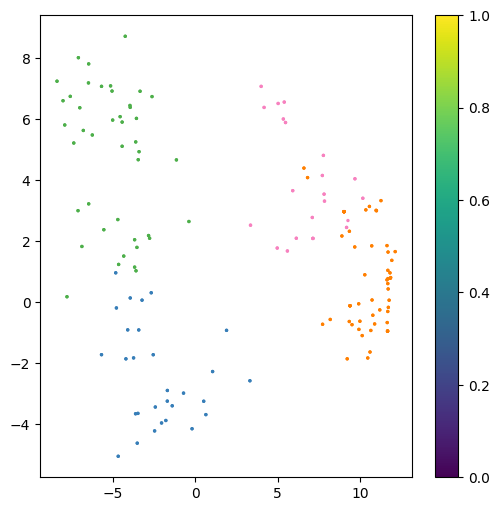

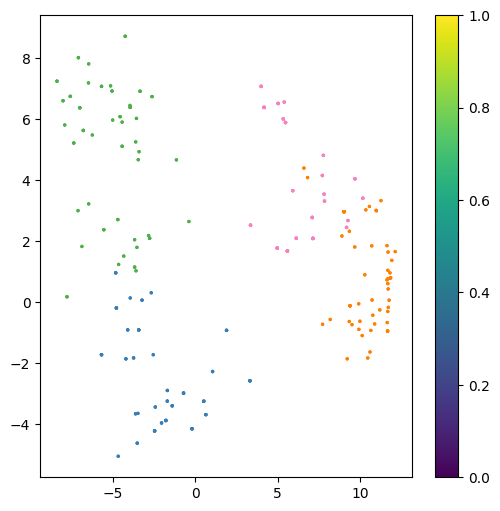

In [93]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

In [94]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_resampled, y_resampled)

In [95]:
#X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)

In [96]:
from imblearn.over_sampling import SMOTE, ADASYN
start_time = time.time()
X_resampled2, y_resampled2 = SMOTE().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

0.00597071647644043

In [97]:
start_time = time.time()
clf_smote = LinearSVC().fit(X_resampled2, y_resampled2)
end_time = time.time()
end_time-start_time

0.005127668380737305

In [98]:
start_time = time.time()
X_resampled3, y_resampled3 = ADASYN().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

0.00994420051574707

In [99]:
start_time = time.time()
clf_adasyn = LinearSVC().fit(X_resampled3, y_resampled3)
end_time = time.time()
end_time-start_time

0.005026578903198242

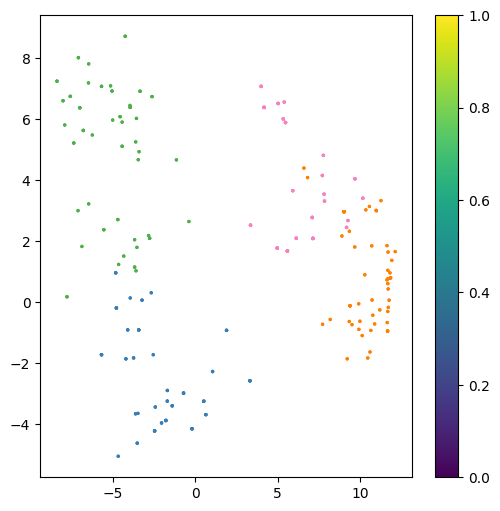

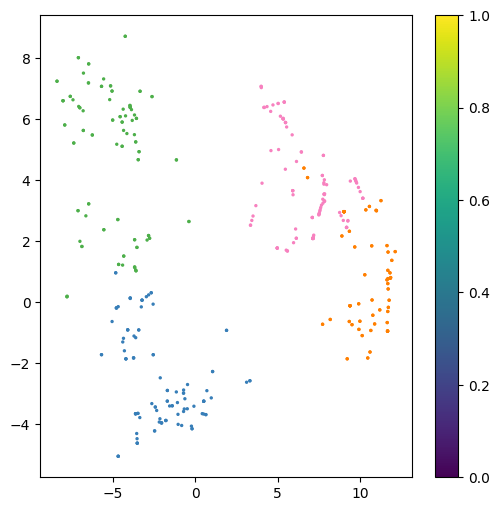

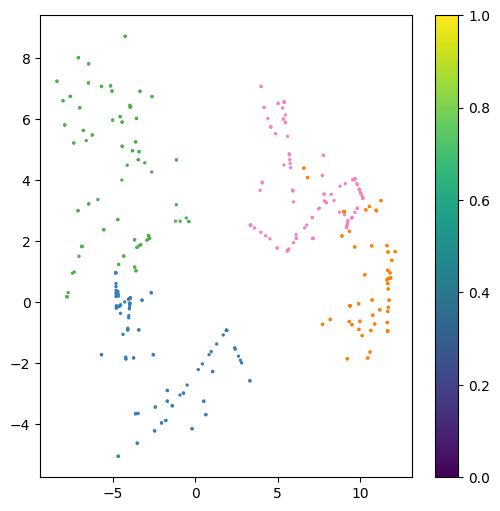

In [100]:
plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled2[:, 0], X_resampled2[:, 1], s=2, c=colors[y_resampled2])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled3[:, 0], X_resampled3[:, 1], s=2, c=colors[y_resampled3])
plt.colorbar()
plt.show()

In [105]:
# Список класифікаторів
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Linear SVC", LinearSVC(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("MLP Classifier", MLPClassifier(max_iter=1000)),
    ("Naive Bayes", GaussianNB())
]

datasets = [
    ("Original", X_embedded, y_pred),
    ("RandomOverSampler", X_resampled, y_resampled),
    ("SMOTE", X_resampled2, y_resampled2),
    ("ADASYN", X_resampled3, y_resampled3)
]

# Оцінка всіх комбінацій
results = []

for clf_name, clf in classifiers:
    print(f"\n--- {clf_name} ---")
    for ds_name, X, y in datasets:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
        clf.fit(X_train, y_train)
        y_pred_val = clf.predict(X_val)
        acc = accuracy_score(y_val, y_pred_val)
        results.append((clf_name, ds_name, acc))
        print(f"{ds_name:20s}: Accuracy = {acc:.4f}")

# Зведена таблиця результатів
import pandas as pd
results_df = pd.DataFrame(results, columns=["Classifier", "Dataset", "Accuracy"])
print("\n===== Підсумкова таблиця точності =====")
print(results_df.pivot(index="Classifier", columns="Dataset", values="Accuracy"))


--- Logistic Regression ---
Original            : Accuracy = 0.9467
RandomOverSampler   : Accuracy = 1.0000
SMOTE               : Accuracy = 1.0000
ADASYN              : Accuracy = 1.0000

--- Linear SVC ---
Original            : Accuracy = 0.8800
RandomOverSampler   : Accuracy = 0.9818
SMOTE               : Accuracy = 0.9818
ADASYN              : Accuracy = 0.9820

--- Random Forest ---
Original            : Accuracy = 0.9467
RandomOverSampler   : Accuracy = 0.9727
SMOTE               : Accuracy = 1.0000
ADASYN              : Accuracy = 1.0000

--- KNN ---
Original            : Accuracy = 0.8933
RandomOverSampler   : Accuracy = 0.9818
SMOTE               : Accuracy = 0.9818
ADASYN              : Accuracy = 0.9910

--- Decision Tree ---
Original            : Accuracy = 0.9733
RandomOverSampler   : Accuracy = 0.9727
SMOTE               : Accuracy = 1.0000
ADASYN              : Accuracy = 0.9910

--- MLP Classifier ---
Original            : Accuracy = 0.9467
RandomOverSampler   : Accura